**Applied Empirical Analysis (HS 2020)**

**Conny Wunsch, Ulrike Unterhofer and Véra Zabrodina** -- University of Basel

***

# Lab Session 2 - Selection on Observables


***

## Application: What Did All the Money Do? On the General Ineffectiveness of Recent West German Labour Market Programmes
**Conny Wunsch and Michael Lechner, Kyklos 2008**


## 1. Setup and Data

* Evaluate the effect of an **online application coaching program for unemployed workers** on their employment outcomes
* This full-time course can only be started within the first month of unemployment, and lasts for **1 month**.
* Any worker can voluntarily participate, in agreement with their randomly-assigned caseworker. 
* Participation is however mandatory for all workers older than 60.
* Caseworkers are instructed to encourage older workers, as well as women with lower education to participate. 
* The program's capacity is limited each month.

* We have representative data on unemployment spells that started in 20XX, with a rich set of observable individual characteristics.



List of variables: 


|Variable name| Description|
|:----|:----|
|*id*|Individual identifier|
|*idobs*|Spell ID|
|*date_start*|Start of unemployment spell|
|*date_end*|Spell end|
|*spell*|Unemployment spell|
|*num_spells*|Number of unemployment spells|
|*treat*|Treated|
|*duration*|Spell duration|
|*employed1y*|Employed within 1 year|
|*sex*|Gender (Female=1)|
|*marits*|Marital status (Married=1)|
|*region*|Region|
|*educ*|Education|
|*insured_earn*|Insured earnings|
|*lastj_occpt*|Occupation last job|
|*lastj_fct*|Function last job|
|*contr_5y*|Months contribution in last 5 years|
|*unempl_r*|Unemployment rate|
|*full_time*|Full time employed last job|
|*swiss*|Swiss citizen|
|*age*|Age|
|*agegr*|Age group|
|*quarter*|Quarter|



## 2. Identification strategy and assumptions

Last time, we used parametric estimation methods (i.e. simple OLS) for a selection on observables identification strategy. 

### Today, we move to semiparametric estimation.  


### Notation

* $D_i \in \{0,1\}$ ... treatment (program participation)
* $Y^*_{0i}$ ... potential outcome under no participation (unemployment duration)
* $Y^*_{1i}$ ... potential outcome under participation
* $Y_{0i}$, $Y_{1i}$  ... observed outcomes

### Effects of interest

Average Treatement Effect: $ATE = {\rm E} [Y^*_{1i} - Y^*_{0i}]$


Average Treatment Effect on the Treated: $ATET = {\rm E} [Y^*_{1i} - Y^*_{0i}|D_i =1]$

Average Treatment Effect on the Non-Treated: $ATENT ={\rm E} [Y^*_{1i} - Y^*_{0i}|D_i =0]$
 
 
### Discussion of identifying assumptions

* What do these assumptions mean in words?

* What could invalidate them? Think of concrete examples or mechanisms.

* Which arguments or evidence can you provide to support that they hold?


**A1 -- Stable unit treatment value assumption (SUTVA)**

$Y_i=D_iY^*_{1,i}+(1-D_i)Y^*_{0,i}$

**A2 -- Conditional independence assumption (CIA)**

$ Y^*_{1} ,Y^*_{0}\perp D|X $

Treatment is random, i.e. independent of outcomes, conditional on $X$.

**A3 -- Common support (CS)**

$0<Pr(D=1|X=x)<1$

There are always both treated ($D=1$) and nontreated ($D=0$) with the same $X$.


### Compared to parametric estimation

* Which assumptions does semiparametric estimation relax?
* Which additional/different assumptions does it impose?
* Which effects do we identify?
* Which issue do semiparametric methods solve compared to non-parametric methods?


## 3. Empirical analysis

### Load Packages and set directory

In [54]:
# remove old objects from R working space
rm(list=ls())

# Define packages that you need
packages_vector <- c("tidyverse", "haven", "Hmisc", "dplyr", 
                     "tidyr", "stringr", "sandwich", "lmtest", 
                     "jtools", "fBasics", "knitr", "xtable", 
                     "data.table", "stargazer", "AER", 
                     "causalweight", "np")

lapply(packages_vector, require, character.only = TRUE) 
(.packages())

# !!! Uncomment the line below to install packages (first time only) if you run this on your computer !!!
#install.packages(packages_vector) 

# Working Directory
# work_dir <- "..."
# setwd(work_dir)


# LOAD FUNCTIONS for radiusmatching (should be stored in the working directory)
source("radiusmatch.R")
source("radiusatet.R")
source("inferenceweights.R")
source("inferenceweights2.R")

# Function for table display
repr_html.xtable <- function(obj, ...){
    paste(capture.output(print(obj, type = 'html')), collapse="", sep="")
}


Loading required package: tidyverse

Warning message:
"package 'tidyverse' was built under R version 3.6.3"
Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'tibble' 2.1.3 is already loaded, but >= 3.0.0 is required



[[1]]
[1] FALSE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[1] "np"           "causalweight" "AER"          "car"          "carData"     
 [6] "stargazer"    "data.table"   "xtable"       "knitr"        "fBasics"     
[11] "timeSeries"   "timeDate"     "jtools"       "lmtest"       "zoo"         
[16] "sandwich"     "stringr"      "tidyr"        "dplyr"        "Hmisc"       
[21] "ggplot2"      "Formula"      "survival"     "lattice"      "haven"       
[26] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[31] "methods"      "base"

### Load data

In [55]:
load("data_reg_final.RData")

# Define variables (see last session) - need matrices!
y1 <- as.matrix(data_reg$duration)
treat <- as.matrix(data_reg$treat)
x1 <- as.matrix(dplyr::select(data_reg, xcat_names_reg, xcont_names, starts_with("quarter_")))
x_names<- colnames(x1)

# Inspect data
head(data_reg)

,id,idobs,date_end,date_start,spell,num_spells,treat,duration,employed1y,insured_earn,...,lastj_fct_1,lastj_fct_3,lastj_fct_99,agegr_2,agegr_3,agegr_4,quarter,quarter_1,quarter_2,quarter_3
,<dbl>,<int>,<date>,<date>,<int>,<int>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,...,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,1,1,2013-10-22,2013-03-04,1,1,0,233,1,4368,...,0,0,1,1,0,0,1,1,0,0
2,2,2,2013-12-31,2013-04-17,1,1,0,259,1,5579,...,0,0,0,0,1,0,2,0,1,0
3,3,3,2012-02-14,2011-12-20,1,1,1,57,1,2710,...,0,0,0,1,0,0,4,0,0,0
4,5,4,2013-04-01,2013-01-01,1,2,1,91,1,4896,...,0,0,0,0,1,0,1,1,0,0
5,5,5,2013-09-17,2013-07-01,2,2,1,79,1,4896,...,0,0,0,0,1,0,3,0,0,1
6,7,6,2013-03-17,2013-01-07,1,2,1,70,1,5370,...,0,0,1,1,0,0,1,1,0,0


## 3. Semiparametric estimation: General procedure

1. Understand the mechanisms that determine treatment assignment and self-selection into treatment. The choice of covariates should be guided by large observed differences in covariates, institutional knowledge and theoretical considerations. 
2. Estimate the treatment probability $Pr(D = 1|X = x)$ parametrically using a probit or logit model.
3. Predict the treatment probability, i.e. compute the propensity score (p-score), $p(X_i)$.
4. Check for overlap (common support) in p-score across treated and control groups, and possibly trim observations with no overlap.
5. Choose an effect of interest (e.g. ATET) and a semiparametric estimator (e.g. IPW, nearest-neighbour matching, radius matching, etc.), and compute the corresponding weights using the p-score.
6. For inference, bootstrap everything (often directly available as an option in packages).
7. Check for changes in considered population and balancedness in covariates.


Having chosen our $X$'s, we go straight to step 2.

### 2. Estimate the treatment probability parametrically using a probit model

$$Pr(D=1|X=x)=\Phi(\alpha+\sum_{k=1} ^K\beta_kX_{k,i})$$ 

In [56]:
# Estimate the p-score model
pscore.model <- glm(treat ~ x1, family = binomial(link = "probit"))
summ(pscore.model, , robust = "HC1")

MODEL INFO:
Observations: 19084
Dependent Variable: treat
Type: Generalized linear model
  Family: binomial 
  Link function: probit 

MODEL FIT:
<U+03C7>²(49) = 1474.53, p = 0.00
Pseudo-R² (Cragg-Uhler) = 0.10
Pseudo-R² (McFadden) = 0.06
AIC = 24949.22, BIC = 25342.05 

Standard errors: Robust, type = HC1
-----------------------------------------------------
                          Est.   S.E.   z val.      p
---------------------- ------- ------ -------- ------
(Intercept)               0.27   0.05     4.94   0.00
x1sex_1                   0.15   0.02     6.33   0.00
x1marits_1               -0.31   0.02   -14.75   0.00
x1region_1                0.08   0.05     1.48   0.14
x1region_2               -0.04   0.03    -1.10   0.27
x1region_3               -0.00   0.04    -0.13   0.89
x1region_4                0.02   0.04     0.51   0.61
x1region_5               -0.05   0.03    -1.41   0.16
x1region_7               -0.14   0.08    -1.78   0.08
x1swiss_0                -0.02   0.02    -0.

### 3. Predict the treatment probability, i.e. compute the p-score, $p(X_i)$ 

In [57]:
data_reg$pscore <- pscore.model$fitted.values 

### 4. Check for overlap (common support) in p-score across treated and control groups

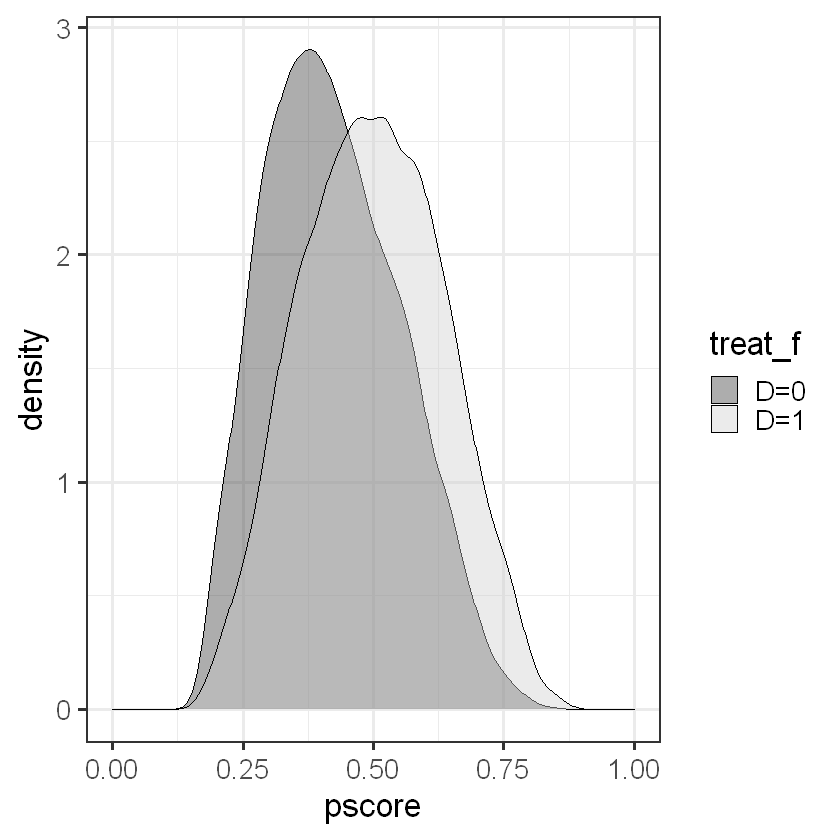

In [58]:
data_reg$treat_f <- factor(data_reg$treat, 
                           levels = c(0,1), 
                           label = c("D=0", "D=1")) 

ggplot(data_reg, aes(x = pscore, fill = treat_f)) + 
    geom_density(alpha=0.4) + 
    scale_fill_grey()+ 
    theme_bw(base_size = 20) +
    xlim(0, 1)

### Trim observations with no overlap

We delete treated observations with a p-score larger than the maximum p-score in the control population

In [59]:
print("Sample size before imposing common support ")
nrow(data_reg)

pscore_max0 <-max(data_reg$pscore[treat==0])
insample<- ifelse(data_reg$pscore <= pscore_max0 
                  & data_reg$pscore != 0
                  & data_reg$pscore != 1
                  & !is.na(data_reg$pscore)
                  , 1, 0)

# You could impose some additional trimming, e.g. add a condition 
# & ((data_reg$pscore>0.05) | (data_reg$pscore<0.95)) 

[1] "Sample size before imposing common support "


[1] 19084

In [60]:
# Store a new data frame with the relevant sample 
data_ipw <- dplyr::filter(data_reg, insample ==1)
print("Sample size after imposing common support ")
nrow(data_ipw)

# redefine variables
y1_ipw <- y1[insample==1]
treat_ipw <- treat[insample==1]
x1_ipw <- x1[insample==1,] 
# need comma here, since it's a matrix and not a column vector

[1] "Sample size after imposing common support "


[1] 19076

### 5. Choose the effect of interest and a semiparametric estimator, and compute the corresponding weights using the p-score

#### Say we want to estimate the average treatment effect on the treated (ATET)

$$ \text{ATET} = \sum_{i=1}^N\frac{D_iY_i}{\sum_{i=1}^N D_i} - \sum_{i=1}^N\frac{(1-D_i)w(X_i)Y_i}{\sum_{i=1}^N(1-D_i)w(X_i)}$$

The first term is directly observed, we want to estimate the second one (counterfactual). 

#### .... using inverse probability weighting (IPW)

Since we have the p-score, we can compute the weights. 

Here, the weights are

$$w(X_i)=\frac{p(X_i)}{1-p(X_i)}$$

First, we compute the IPW estimator manually for illustration.


In [61]:
data_ipw$weight[treat_ipw==1] <- 1
data_ipw$weight[treat_ipw==0] <- data_ipw$pscore[treat_ipw==0]/
                                (1-data_ipw$pscore)[treat_ipw==0]
weight <- data_ipw$weight

(No inference here. We will show you how to set up a bootstrap manually in lab session 5 on causal mediation analysis).

Then, the ATET is computed as

In [62]:
Y1<-sum(y1_ipw*treat_ipw)/sum(treat_ipw)
Y0<-sum(y1_ipw*(1-treat_ipw)*weight)/sum((1-treat_ipw)*weight)
ipw_atet_manual <- Y1-Y0

print("Effect on unemployment duration based on IPW (ATET)")
ipw_atet_manual

[1] "Effect on unemployment duration based on IPW (ATET)"


[1] -97.63518

Keep in mind:

* Weights can become very large if $1 - p(X_i)$ is very small, which implies that these controls have a strong impact on the estimate
* Trimming large weights (define maximum acceptable weight) improves stability of the estimate


Next, we apply the `causalweight` package, which does everything automatically (but a bit of a black box, e.g. does not show you common support plots!). 

Inference by bootstrap and trimming can be implemented directly. For more details, see https://cran.r-project.org/web/packages/causalweight/index.html

In [63]:
# IPW - Estimating the ATET based on the causalweight package
ipw_atet <- treatweight(y=y1_ipw, 
                        d=treat_ipw, 
                        x=x1_ipw, 
                        ATET =TRUE, 
                        trim=0.05, 
                        boot = 2)
ipw_atet

$effect
[1] -97.6506

$se
[1] 0.1436365

$pval
[1] 0

$y1
[1] 103.1038

$y0
[1] 200.7544

$ntrimmed
[1] 0

### 6. For inference, bootstrap everything

Just ran it with 2 replication as an example (minimum for the package to work), because it takes a while. 

Rerun the code above, specifying a higher number of bootstrap replications (e.g. 199) and see for yourself. 

### 7. Check for changes in considered population and balancedness in covariates

We compare the differences in selected characteristics between the treatment and control group after reweighting 

Add the `weight` option in the computation of the difference.

In [64]:
# Define a vector of covariates (manual IPW sample)
x_sel <- as.matrix(dplyr::select(data_ipw, sex_1, marits_1, 
                                 educ_0, educ_2, educ_3, 
                                 agegr_2, agegr_3, agegr_4, 
                                 swiss_0))
x_sel_names <- colnames(x_sel)

# Define a function estimating the differences 
balanced.model <- function(x){
    
    weighted_diff <- lm(x[insample==1] ~ treat_ipw, # specify correct sample!
                        weight=data_ipw$weight) # specify weights!
    cov <- vcovHC(weighted_diff, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    list(diff = weighted_diff$coefficients[2], 
        robust.se = robust.se[2], 
        pval = 2*pnorm(-abs(weighted_diff$coefficients[2]/robust.se[2])) )
                    }

diff_output <- apply(x_sel, 2, balanced.model)
diff_output<-rbindlist(diff_output)
rownames(diff_output)<- x_sel_names

# Table
print("Differences in X between control and treatment group after reweighting")
xtable(diff_output, digits=3)

[1] "Differences in X between control and treatment group after reweighting"


,diff,robust.se,pval
sex_1,0.012,0.008,0.116
marits_1,-0.011,0.008,0.156
educ_0,-0.004,0.007,0.516
educ_2,0.002,0.003,0.538
educ_3,0.001,0.006,0.899
agegr_2,-0.002,0.007,0.750
agegr_3,-0.004,0.007,0.541
agegr_4,-0.009,0.006,0.107
swiss_0,-0.001,0.008,0.936


### Another estimator: Radius matching 

In this case, the weights for the ATET are defined as 

$$w(X_i)=\sum_{j:D_j=1}\frac{\underline{1}(|p(X_j)-p(X_i)|<r)}{|p(X_j)-p(X_i)|}\Big/\sum_{k:D_k=0}\frac{\underline{1}(|p(X_j)-p(X_k)|<r)}{|p(X_j)-p(X_k)|}$$

The estimator uses all control observations with a p-score within a chosen radius $r$.

The `radiusmatching` package by Huber et al. (2015) additionally applies some bias correction and is doubly robust (see lecture slides). To download the package, go to https://www.alexandria.unisg.ch/218871/

Package options:
* Specify the number of bootstrap replications (again, takes a while). 
* The radius is defined by the multiplier of the maximum distance in pair matching. E.g., setting `radius=3` implies a radius of 3 times the maximum distance (or a particular quantile).

In [65]:
# Applying the radiusmatching package to the initial sample (data_reg)

rmatch_atet <- radiusmatch(y=y1, d=treat, x=x1, 
                           biascorr=1, 
                           commonsup = 1, 
                           radius = 3, 
                           estimand ="ATET", 
                           boot=1)

print("Effect on unemployment duration based on radiusmatching (ATET)")
rmatch_atet$effect
print("bootstrapped S.E.")
rmatch_atet$se.boot
# NA if only 1 replication

[1] "Effect on unemployment duration based on radiusmatching (ATET)"


[1] -98.14677

[1] "bootstrapped S.E."


[1] NA

***

## Extension : monthly effects

Going back to parametric estimation, we estimate the effects on the individual's monthly employment probability up to 2 years after program start.

### (1) Define monthly employment outcomes


In [66]:
# Set maximum horizon to look at after start of unemployment, 24 months
maxdur <- 24

# Dummies =1 if individual employed in month i after start 
empl <- matrix(0, nrow=nrow(data_reg), ncol=(maxdur))
empl_list <- paste("empl", 1:maxdur, sep="_")
colnames(empl) <- empl_list

for (i in 1:maxdur) {
  empl[,i] = ifelse(data_reg$date_end < data_reg$date_start + 30*i, 1, 0)
}

empl <- as.data.frame(empl, data_reg$treat)
data_reg <- cbind(data_reg, empl)

head(empl)

,empl_1,empl_2,empl_3,empl_4,empl_5,empl_6,empl_7,empl_8,empl_9,empl_10,...,empl_15,empl_16,empl_17,empl_18,empl_19,empl_20,empl_21,empl_22,empl_23,empl_24
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X0,0,0,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
X0.1,0,0,0,0,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
X1,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
X1.1,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
X1.2,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
X1.3,0,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### (2) Plot monthly employment

In [67]:
empl_monthly_treat <- apply(t(empl[treat==1,]),1,mean)
empl_monthly_contr <- apply(t(empl[treat==0,]),1,mean)

month <- rep(1:maxdur)
empl_monthly <- cbind(empl_monthly_treat, empl_monthly_contr, month)
colnames(empl_monthly) <- c("rate_treat", "rate_contr", "month")
empl_monthly <- as.data.frame(empl_monthly)

empl_monthly_treat

empl_1     empl_2     empl_3     empl_4     empl_5     empl_6     empl_7 
0.02183356 0.18552812 0.39540466 0.79858253 0.90112026 0.94067215 0.97016461 
    empl_8     empl_9    empl_10    empl_11    empl_12    empl_13    empl_14 
0.98331047 0.98536808 0.98708276 0.98834019 0.98902606 0.99016918 0.99051212 
   empl_15    empl_16    empl_17    empl_18    empl_19    empl_20    empl_21 
0.99108368 0.99142661 0.99165524 0.99245542 0.99256973 0.99279835 0.99348422 
   empl_22    empl_23    empl_24 
0.99371285 0.99405578 0.99428441

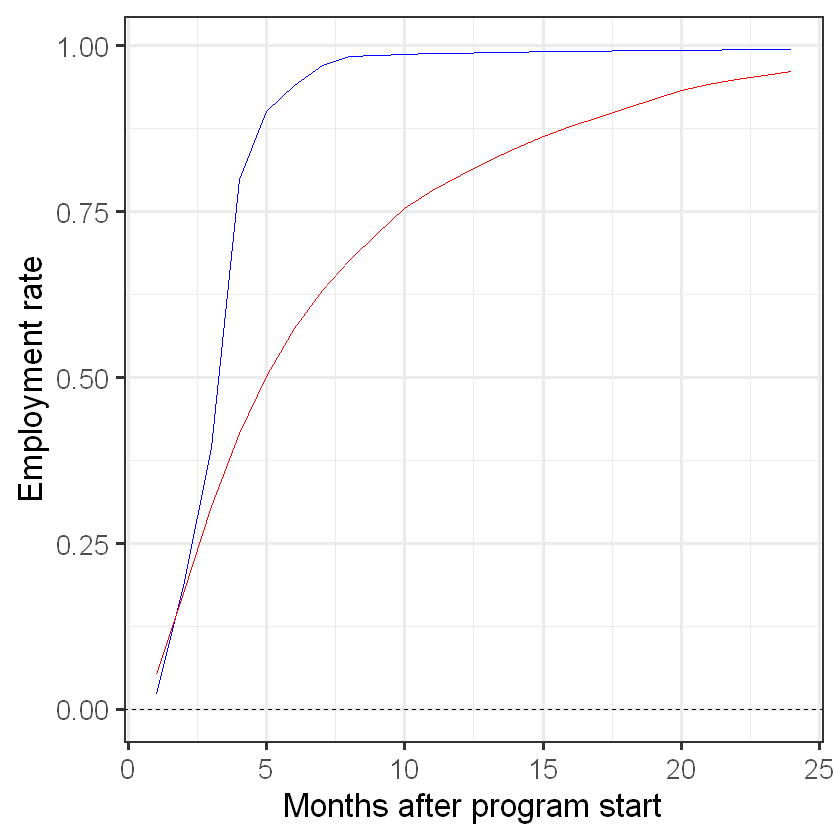

In [68]:
ggplot() +
  geom_line(data = empl_monthly, aes(x = month, y = rate_treat), color = "blue") +
  geom_line(data = empl_monthly, aes(x = month, y = rate_contr), color = "red") +
  theme_bw(base_size = 20) +
  ylab("Employment rate") +
  xlab("Months after program start") +
  geom_hline(yintercept = 0, linetype="dashed") 

### (3) Estimate monthly effects (OLS)

In [69]:
reg_monthly <- function(y) {
  out <- lm(y ~ treat + x1)
  out2 <- coeftest(out, vcov = vcovHC(out))
  list(effect=out2[2,1], se=out2[2,2])
}

In [70]:
# Compute confidence intervals and dots marking significant effects
    reg_monthly_out <- apply(empl, 2, reg_monthly)
      reg_monthly_out2 <- rbindlist(reg_monthly_out)
      reg_monthly_out2$month <- rep(1:maxdur)
      reg_monthly_out2$cil <- reg_monthly_out2$effect - 1.96*reg_monthly_out2$se
      reg_monthly_out2$cih <- reg_monthly_out2$effect + 1.96*reg_monthly_out2$se
      reg_monthly_out2$sig <- ifelse(abs(reg_monthly_out2$effect)
                                /reg_monthly_out2$se>1.64, 
                                reg_monthly_out2$effect, NA)

Warning message:
"Removed 1 rows containing missing values (geom_point)."


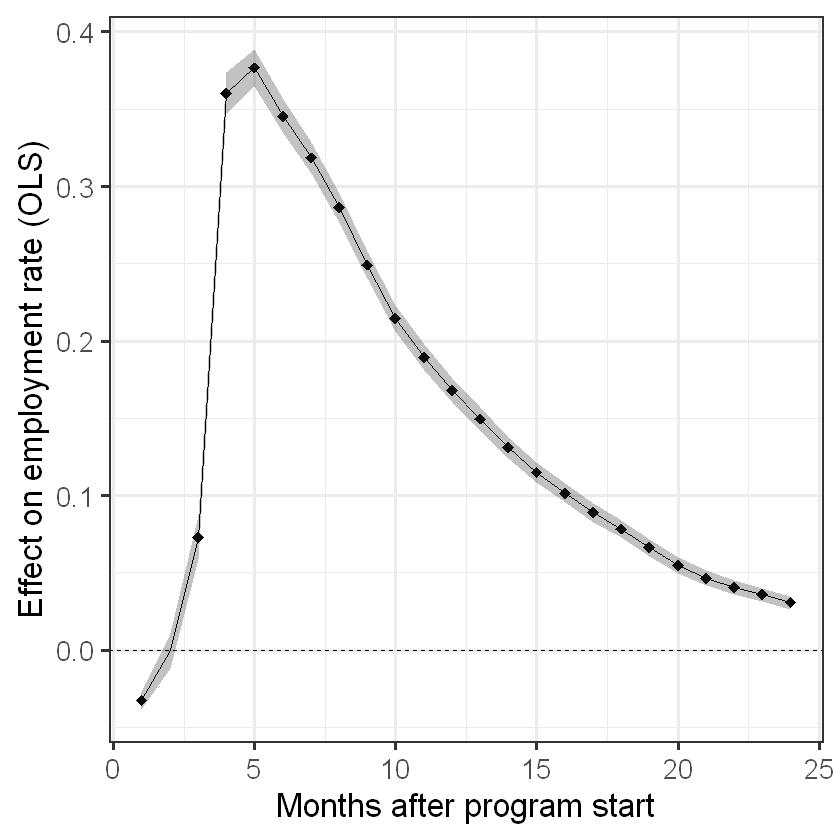

In [71]:
ggplot(reg_monthly_out2, aes(x = month, y = effect)) +
  geom_point(aes(x = month, y = sig), shape = 18, size  = 3) +
  geom_ribbon(aes(ymin  = cil, ymax  = cih), alpha=0.3) +
  geom_line() +
  theme_bw(base_size = 20) +
  xlab("Months after program start") +
  ylab("Effect on employment rate (OLS)") +
  geom_hline(yintercept = 0, linetype="dashed") 

What does this pattern suggest?